# Imports

In [140]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import tensorflow as tf
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Dropout, MaxPool1D, ReLU, Flatten, BatchNormalization

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, accuracy_score

In [298]:
directory = "/content/gdrive/MyDrive/GW_SOP/Code/debugging/1D-CNN Multi-level/Signal_HIDDEN_in_strain_data/ALIGO_noise/Test 5/data/"

In [299]:
bbh_events= ['GW190519_153544',
             'GW170823',
             'GW190814',
             'GW190728_064510',
             'GW151226',
             'GW190421_213856',
             'GW190727_060333',
             'GW190513_205428',
             'GW190521_074359',
             'GW190408_181802',
             'GW170729',
             'GW190915_235702',
             'GW190929_012149',
             'GW190910_112807',
             'GW170104',
             'GW190909_114149',
             'GW190424_180648',
             'GW190512_180714',
             'GW190412',
             'GW190517_055101',
             'GW190620_030421',
             'GW190706_222641',
             'GW170814',
             'GW190708_232457',
             'GW151012',
             'GW190930_133541',
             'GW190731_140936',
             'GW190828_065509',
             'GW190701_203306',
             'GW150914',
             'GW190720_000836',
             'GW190719_215514',
             'GW190924_021846',
             'GW170608',
             'GW190503_185404',
             'GW190514_065416',
             'GW190527_092055',
             'GW190413_134308',
             'GW190425',
             'GW190602_175927',
             'GW190521',
             'GW170809',
             'GW170818',
             'GW190413_052954',
             'GW190828_063405',
             'GW190707_093326',
             'GW190630_185205',
             'GW190803_022701']

bns_events = ['GW170817', 'GW190425']

# Testing on unseen generated data

## Level 1

In [300]:
noise_df = pd.read_csv("/content/gdrive/MyDrive/GW_SOP/Data/val_Final_Merged_Noise_Reduced_No_Abs.csv", header=None)
noise = noise_df.values.astype(float)


data_BBH_df = pd.read_csv("/content/gdrive/MyDrive/GW_SOP/Data/val_Final_BBH_Merged_Noise_Signal_Reduced_No_ABS.csv", header=None)
data_BBH = data_BBH_df.values.astype(float)


data_BNS_df = pd.read_csv("/content/gdrive/MyDrive/GW_SOP/Data/val_Final_BNS_Merged_Noise_Signal_Reduced_No_ABS.csv", header=None)
data_BNS = data_BNS_df.values.astype(float)

In [301]:
X = np.concatenate((noise, data_BBH, data_BNS), axis=0)
print(X.shape)

(3000, 16384)


In [302]:
X *= 1e19
print(X)

[[-12.66237375  -7.10454873  -1.93002241 ...   7.75026284 -19.27366344
   16.74202077]
 [-14.04545007   2.89150861   6.69552833 ...   7.72863868  13.51669763
   -0.15894143]
 [ -0.19188579   5.38917682   3.95968425 ... -12.60226351   1.81652994
   -6.16624244]
 ...
 [ 16.38978149   4.00031024 -11.03916174 ...  15.21480913 -14.41520939
    8.74220208]
 [ -2.65177947 -11.11591142 -18.04493691 ...  26.24060909 -25.77572416
    9.39236201]
 [-26.984002    10.16253588 -17.68832777 ...   9.91613418   2.59292417
    1.59885639]]


In [303]:
y = [[0, -1] for i in range(1000)] + [[1, 0] for i in range(1000)] + [[1, 1] for i in range(1000)]
y = np.array(y)
print(y)

[[ 0 -1]
 [ 0 -1]
 [ 0 -1]
 ...
 [ 1  1]
 [ 1  1]
 [ 1  1]]


In [304]:
X = np.expand_dims(X, axis=-1)
print(X.shape)

(3000, 16384, 1)


In [305]:
X_test_l1, _, y, _ = train_test_split(X, y, test_size=1)

y_l2 = [y[i,1] for i in range(len(y))]
y_test_l1 = [y[i,0] for i in range(len(y))]

In [306]:
print(y_l2)

[1, 0, 0, 1, 1, -1, -1, -1, 0, 1, 1, 0, 1, 1, -1, 1, 0, 0, 0, 0, -1, 0, 0, -1, 1, 1, -1, -1, 1, -1, 0, -1, -1, 1, 1, 0, 0, -1, 1, 1, 1, -1, -1, 0, -1, 1, -1, -1, -1, 1, -1, 0, 1, 0, 1, 1, 0, 0, 0, -1, 1, -1, 0, -1, 0, 0, -1, -1, 0, 1, -1, 0, 0, 0, 1, -1, 1, 1, 0, 0, -1, -1, 1, -1, -1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 0, -1, -1, 1, 1, -1, 0, -1, -1, -1, 0, 0, 0, 0, 1, 1, 0, -1, -1, -1, 1, 1, 1, -1, -1, 1, 0, 1, 1, -1, 0, 1, 0, 1, -1, 0, -1, -1, 1, -1, 0, 0, -1, 0, 0, 1, 0, 0, -1, -1, -1, -1, -1, 1, 1, 1, 1, 0, -1, -1, 1, -1, -1, 1, -1, 1, -1, 0, -1, 1, 0, -1, 1, -1, 0, -1, -1, -1, 1, 1, -1, 1, 0, -1, 1, 0, -1, -1, 1, 0, 0, 1, 1, 1, -1, 0, 0, 0, 0, 0, 1, -1, 1, 1, 0, 0, 0, -1, -1, -1, -1, -1, 0, 1, 0, 1, 0, -1, 0, 1, 0, 1, 1, -1, -1, 0, 0, 0, 1, 1, 0, 1, 1, 0, -1, 0, 1, 0, 0, 0, 0, -1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, -1, -1, 1, 0, 1, 0, 0, 0, -1, 0, 1, 1, 0, -1, 0, 1, -1, 0, 0, -1, 0, 1, -1, 0, -1, 1, 1, 1, 1, -1, 1, 0, 1, 1, 0, 1, 0, -1, 0, -1, -1

In [307]:
print(y_test_l1)

[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 

In [308]:
model_l1 = load_model(directory + "model_trial_1_level_1.h5")

In [309]:
pred_l1 = model_l1.predict(X_test_l1)

In [310]:
# y_pred = np.argmax(pred_l1, axis = 1)
# for i in range(2999):
#   print(y_test_l1[i], y_pred[i])

In [311]:
y_pred = np.argmax(pred_l1, axis = 1)
correct_l1 = 0
X_test_l2 = []
y_test_l2 = []

for i in range(len(y_test_l1)):
  if y_pred[i]==y_test_l1[i]:
    correct_l1 += 1

  if y_pred[i]==1 and y_l2[i]!=-1:
    X_test_l2.append(X_test_l1[i])
    y_test_l2.append(y_l2[i])

acc = (correct_l1/len(y_test_l1))*100
print(f"Total no. of data samples in level 1: {len(y)}")
print(f"No. of correct predictions: {correct_l1}")
print(f"Level 1 accuracy: {acc}")
print(f"No. of data samples sent to level 2 model: {len(y_test_l2)}")

Total no. of data samples in level 1: 2999
No. of correct predictions: 2997
Level 1 accuracy: 99.93331110370124
No. of data samples sent to level 2 model: 1998


Precision: 1.000
Recall: 0.999
F1-Score: 0.999


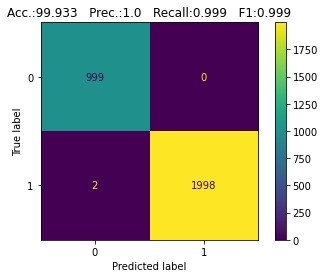

In [312]:
precision = precision_score(y_test_l1, y_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_test_l1, y_pred, average='binary')
print('Recall: %.3f' % recall)

score = f1_score(y_test_l1, y_pred, average='binary')
print('F1-Score: %.3f' % score)

cm = confusion_matrix(y_test_l1, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title('Acc.:'+str(round(acc, 3))+'   Prec.:'+str(round(precision, 3))+'   Recall:'+str(round(recall, 3))+'   F1:'+str(round(score, 3)))
plt.savefig(directory[:-5]+"screenshots/gen_test_cm_1_level_1.png")
plt.show()

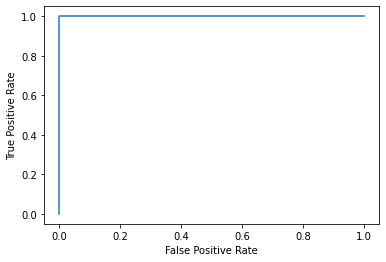

In [313]:
pos_probs = pred_l1[:,1]
fpr, tpr, _ = roc_curve(y_test_l1, pos_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig(directory[:-5]+"screenshots/gen_test_roc_1_level_1.png")
plt.show()

## Level 2

In [314]:
X_test_l2 = np.array(X_test_l2)
y_test_l2 = np.array(y_test_l2)
print(X_test_l2.shape)

(1998, 16384, 1)


In [315]:
model2 = load_model(directory + "model_trial_1_level_2.h5")

In [316]:
pred_l2 = model2.predict(X_test_l2)

In [317]:
y_pred = np.argmax(pred_l2, axis = 1)
correct_l2 = 0

for i in range(len(y_test_l2)):
  if y_pred[i]==y_test_l2[i]:
    correct_l2 += 1

acc = (correct_l2/len(y_test_l2))*100
print(f"Total no. of data samples in level 2: {len(y_test_l2)}")
print(f"No. of correct predictions: {correct_l2}")
print(f"Level 2 accuracy: {acc}")

Total no. of data samples in level 2: 1998
No. of correct predictions: 1998
Level 2 accuracy: 100.0


Precision: 1.000
Recall: 1.000
F1-Score: 1.000


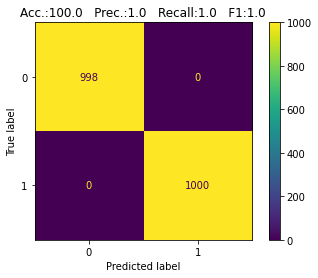

In [318]:
precision = precision_score(y_test_l2, y_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_test_l2, y_pred, average='binary')
print('Recall: %.3f' % recall)

score = f1_score(y_test_l2, y_pred, average='binary')
print('F1-Score: %.3f' % score)

cm = confusion_matrix(y_test_l2, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title('Acc.:'+str(round(acc, 3))+'   Prec.:'+str(round(precision, 3))+'   Recall:'+str(round(recall, 3))+'   F1:'+str(round(score, 3)))
plt.savefig(directory[:-5]+"screenshots/gen_test_cm_1_level_2.png")
plt.show()

In [319]:
print(y_test_l2)

[1 0 0 ... 1 1 0]


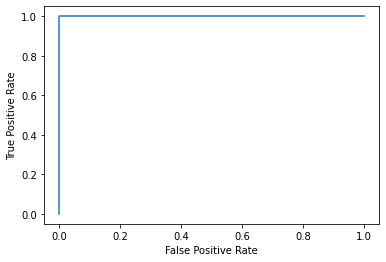

In [320]:
pos_probs = pred_l2[:,1]
fpr, tpr, _ = roc_curve(y_test_l2, pos_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig(directory[:-5]+"screenshots/gen_test_roc_1_level_2.png")
plt.show()

## Overall

In [321]:
y_true = []
probs = []
tmp = []
j = 0

for i in range(len(y)):

  if y[i, 0] == 0:
    y_true.append(0)
    tmp.append(pred_l1[i, 0])
    tmp.append(pred_l1[i, 1])
    tmp.append(pred_l1[i, 1])
    probs.append(tmp)
    tmp = []
  
  elif y[i, 1] == 0:
    y_true.append(1)
    tmp.append(pred_l1[i, 0])

    if pred_l1[i, 0] > pred_l1[i, 1]:
      tmp.append(pred_l1[i, 1])
      tmp.append(pred_l1[i, 1])

    else:
      tmp.append(pred_l2[j, 0])
      tmp.append(pred_l2[j, 1])
      j += 1
    
    probs.append(tmp)
    tmp = []

  else:
    y_true.append(2)
    tmp.append(pred_l1[i, 0])

    if pred_l1[i, 0] > pred_l1[i, 1]:
      tmp.append(pred_l1[i, 1])
      tmp.append(pred_l1[i, 1])

    else:
      tmp.append(pred_l2[j, 0])
      tmp.append(pred_l2[j, 1])
      j += 1

    probs.append(tmp)
    tmp = []

probs = np.array(probs)
y_pred = np.argmax(probs, axis = 1)

Accuracy: 0.999
Precision: 0.999
Recall: 0.999
F1-Score: 0.999


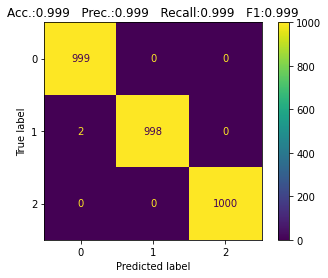

In [322]:
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
plt.show()

precision = np.diag(cm) / np.sum(cm, axis = 0)
precision = sum(precision)/3
print('Precision: %.3f' % precision)

recall = np.diag(cm) / np.sum(cm, axis = 1)
recall = sum(recall)/3
print('Recall: %.3f' % recall)

score = (2*precision*recall)/(precision + recall)
print('F1-Score: %.3f' % score)

disp.plot()
plt.title('Acc.:'+str(round(acc, 3))+'   Prec.:'+str(round(precision, 3))+'   Recall:'+str(round(recall, 3))+'   F1:'+str(round(score, 3)))
plt.savefig(directory[:-5]+"screenshots/gen_test_cm_1_overall.png")
plt.show()

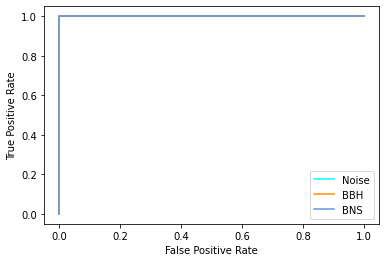

In [323]:
classes = ["Noise", "BBH", "BNS"]
fpr = dict()
tpr = dict()
y_true = tf.keras.utils.to_categorical(y_true)

for i in range(3):
  fpr[i], tpr[i], _ = roc_curve(y_true[:, i], probs[:, i])

colors = itertools.cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(3), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label=f"{classes[i]}",
    )

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.savefig(directory[:-5]+"screenshots/gen_test_roc_1_overall.png")
plt.show()

# Testing on Real data

## Level 1

In [324]:
noise_df = pd.read_csv("/content/gdrive/MyDrive/GW_SOP/Data/better_results/Noise.csv", header=None)
noise = noise_df.values.astype(float)


data_BBH_df = pd.read_csv("/content/gdrive/MyDrive/GW_SOP/Data/better_results/Processed_BBH_Merged_original.csv", header=None)
data_BBH = data_BBH_df.values.astype(float)


data_BNS_df = pd.read_csv("/content/gdrive/MyDrive/GW_SOP/Data/better_results/Processed_BNS_Merged_original.csv", header=None)
data_BNS = data_BNS_df.values.astype(float)

In [325]:
X = np.concatenate((noise, data_BBH, data_BNS), axis=0)
print(X.shape)

(74, 16384)


In [326]:
X *= 1e19
print(X)

[[ -9.59329913   3.0796441    6.2065329  ...  19.55120984 -16.78024269
   21.6448887 ]
 [ 10.74752082  -4.77219826   6.13033155 ...  10.74680815   5.01569204
    2.98535439]
 [ -4.23504473   4.21567553   7.43734108 ...   6.39244242  -4.57442745
   16.42978735]
 ...
 [  0.74529762   0.79148571   0.82671144 ...  -2.28289352  -2.2548838
   -2.33924027]
 [ -1.30982823  -1.33978366  -1.34902886 ...  -0.60990832  -0.64637572
   -0.58081613]
 [ -2.33834513  -2.33877564  -2.40204724 ...   3.76481395   3.6659587
    3.58546225]]


In [327]:
y = [[0, -1] for i in range(24)] + [[1, 0] for i in range(48)] + [[1, 1] for i in range(2)]
y = np.array(y)
print(y)

[[ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 0 -1]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 1  1]
 [ 1  1]]


In [328]:
X_test_l1 = np.expand_dims(X, axis=-1)
print(X_test_l1.shape)

(74, 16384, 1)


In [329]:
y_l2 = [y[i,1] for i in range(len(y))]
y_test_l1 = [y[i,0] for i in range(len(y))]

In [330]:
print(y_l2)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


In [331]:
print(y_test_l1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [332]:
model_l1 = load_model(directory + "model_trial_1_level_1.h5")

In [333]:
pred_l1 = model_l1.predict(X_test_l1)

In [334]:
# y_pred = np.argmax(pred_l1, axis = 1)
# for i in range(2999):
#   print(y_test_l1[i], y_pred[i])

In [335]:
y_pred = np.argmax(pred_l1, axis = 1)
correct_l1 = 0
X_test_l2 = []
y_test_l2 = []
name = []

for i in range(len(y_test_l1)):
  if y_pred[i]==y_test_l1[i]:
    correct_l1 += 1

  if y_pred[i]==1 and y_l2[i]!=-1:
    X_test_l2.append(X_test_l1[i])
    y_test_l2.append(y_l2[i])

    if i < 72:
      name.append(bbh_events[i-24])

    else:
      name.append(bns_events[i-72])

acc = (correct_l1/len(y_test_l1))*100
print(f"Total no. of data samples in level 1: {len(y)}")
print(f"No. of correct predictions: {correct_l1}")
print(f"Level 1 accuracy: {acc}")
print(f"No. of data samples sent to level 2 model: {len(y_test_l2)}")

Total no. of data samples in level 1: 74
No. of correct predictions: 74
Level 1 accuracy: 100.0
No. of data samples sent to level 2 model: 50


Precision: 1.000
Recall: 1.000
F1-Score: 1.000


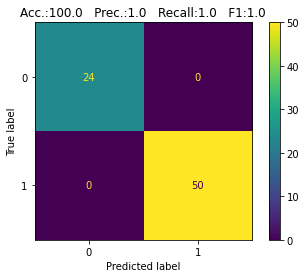

In [336]:
precision = precision_score(y_test_l1, y_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_test_l1, y_pred, average='binary')
print('Recall: %.3f' % recall)

score = f1_score(y_test_l1, y_pred, average='binary')
print('F1-Score: %.3f' % score)

cm = confusion_matrix(y_test_l1, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title('Acc.:'+str(round(acc, 3))+'   Prec.:'+str(round(precision, 3))+'   Recall:'+str(round(recall, 3))+'   F1:'+str(round(score, 3)))
plt.savefig(directory[:-5]+"screenshots/real_cm_1_level_1.png")
plt.show()

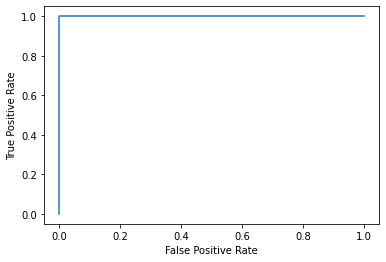

In [337]:
pos_probs = pred_l1[:,1]
fpr, tpr, _ = roc_curve(y_test_l1, pos_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig(directory[:-5]+"screenshots/real_roc_1_level_1.png")
plt.show()

In [338]:
classes = ["Noise", "Signal"]

for i in range(len(X_test_l1)):
  prob = list(pred_l1[i])
  fig = plt.figure(figsize =(4.5,4.5))

  plt.bar(classes, prob, color ='maroon',
          width = 0.4)
  
  plt.ylabel("Probability")

  if i < 24:
    plt.title("Noise")
  else:
    plt.title("Signal")

  plt.savefig(directory + "bar plots/Level 1/" + str(i) + ".png")
  plt.close()
  # plt.show()

np.savetxt(directory + "bar plots/Level 1/probabilities.csv", pred_l1, delimiter=",")

## Level 2

In [339]:
X_test_l2 = np.array(X_test_l2)
y_test_l2 = np.array(y_test_l2)
print(X_test_l2.shape)

(50, 16384, 1)


In [340]:
model2 = load_model(directory + "model_trial_1_level_2.h5")

In [341]:
pred_l2 = model2.predict(X_test_l2)

In [342]:
y_pred = np.argmax(pred_l2, axis = 1)
correct_l2 = 0

for i in range(len(y_test_l2)):
  if y_pred[i]==y_test_l2[i]:
    correct_l2 += 1

acc = (correct_l2/len(y_test_l2))*100
print(f"Total no. of data samples in level 2: {len(y_test_l2)}")
print(f"No. of correct predictions: {correct_l2}")
print(f"Level 2 accuracy: {acc}")

Total no. of data samples in level 2: 50
No. of correct predictions: 48
Level 2 accuracy: 96.0


Precision: 0.000
Recall: 0.000
F1-Score: 0.000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


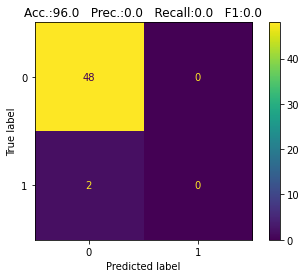

In [343]:
precision = precision_score(y_test_l2, y_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_test_l2, y_pred, average='binary')
print('Recall: %.3f' % recall)

score = f1_score(y_test_l2, y_pred, average='binary')
print('F1-Score: %.3f' % score)

cm = confusion_matrix(y_test_l2, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title('Acc.:'+str(round(acc, 3))+'   Prec.:'+str(round(precision, 3))+'   Recall:'+str(round(recall, 3))+'   F1:'+str(round(score, 3)))
plt.savefig(directory[:-5]+"screenshots/real_cm_1_level_2.png")
plt.show()

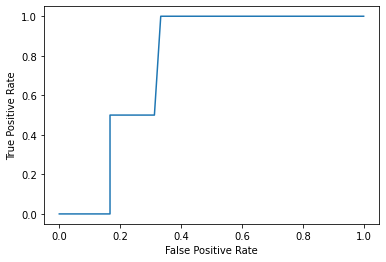

In [344]:
pos_probs = pred_l2[:,1]
fpr, tpr, _ = roc_curve(y_test_l2, pos_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig(directory[:-5]+"screenshots/real_roc_1_level_2.png")
plt.show()

In [345]:
classes = ["BBH", "BNS"]

for i in range(len(X_test_l2)):
  prob = list(pred_l2[i])
  fig = plt.figure(figsize =(4.5,4.5))

  plt.bar(classes, prob, color ='maroon',
          width = 0.4)
  
  plt.ylabel("Probability")

  plt.title(name[i])

  plt.savefig(directory + "bar plots/Level 2/" + str(i) + ".png")
  plt.close()
  # plt.show()

np.savetxt(directory + "bar plots/Level 2/probabilities.csv", pred_l2, delimiter=",")

## Overall

In [346]:
y_true = []
probs = []
tmp = []
j = 0

for i in range(len(y)):

  if y[i, 0] == 0:
    y_true.append(0)
    tmp.append(pred_l1[i, 0])
    tmp.append(pred_l1[i, 1])
    tmp.append(pred_l1[i, 1])
    probs.append(tmp)
    tmp = []
  
  elif y[i, 1] == 0:
    y_true.append(1)
    tmp.append(pred_l1[i, 0])

    if pred_l1[i, 0] > pred_l1[i, 1]:
      tmp.append(pred_l1[i, 1])
      tmp.append(pred_l1[i, 1])

    else:
      tmp.append(pred_l2[j, 0])
      tmp.append(pred_l2[j, 1])
      j += 1
    
    probs.append(tmp)
    tmp = []

  else:
    y_true.append(2)
    tmp.append(pred_l1[i, 0])

    if pred_l1[i, 0] > pred_l1[i, 1]:
      tmp.append(pred_l1[i, 1])
      tmp.append(pred_l1[i, 1])

    else:
      tmp.append(pred_l2[j, 0])
      tmp.append(pred_l2[j, 1])
      j += 1

    probs.append(tmp)
    tmp = []

probs = np.array(probs)
y_pred = np.argmax(probs, axis = 1)

Accuracy: 0.973
Precision: nan
Recall: 0.667
F1-Score: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


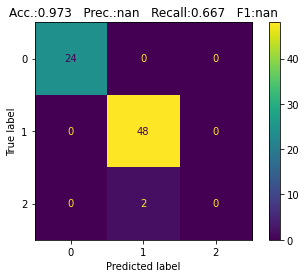

In [347]:
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
plt.show()

precision = np.diag(cm) / np.sum(cm, axis = 0)
precision = sum(precision)/3
print('Precision: %.3f' % precision)

recall = np.diag(cm) / np.sum(cm, axis = 1)
recall = sum(recall)/3
print('Recall: %.3f' % recall)

score = (2*precision*recall)/(precision + recall)
print('F1-Score: %.3f' % score)

disp.plot()
plt.title('Acc.:'+str(round(acc, 3))+'   Prec.:'+str(round(precision, 3))+'   Recall:'+str(round(recall, 3))+'   F1:'+str(round(score, 3)))
plt.savefig(directory[:-5]+"screenshots/real_cm_1_overall.png")
plt.show()

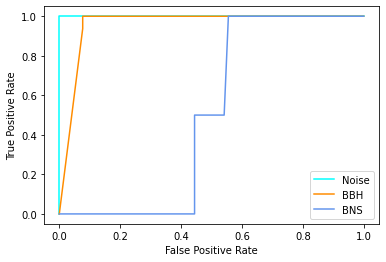

In [348]:
classes = ["Noise", "BBH", "BNS"]
fpr = dict()
tpr = dict()
y_true = tf.keras.utils.to_categorical(y_true)

for i in range(3):
  fpr[i], tpr[i], _ = roc_curve(y_true[:, i], probs[:, i])

colors = itertools.cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(3), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label=f"{classes[i]}",
    )

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.savefig(directory[:-5]+"screenshots/real_roc_1_overall.png")
plt.show()

In [349]:
classes = ["Noise", "BBH", "BNS"]

for i in range(len(X)):
  prob = list(probs[i])
  fig = plt.figure(figsize =(4.5,4.5))

  plt.bar(classes, prob, color ='maroon',
          width = 0.4)
  
  plt.ylabel("Probability")

  if i < 24:
    plt.title("Noise")

  elif i < 72:
    plt.title(bbh_events[i-24])

  else:
    plt.title(bns_events[i-72])

  plt.savefig(directory + "bar plots/Overall/" + str(i) + ".png")
  plt.close()
  # plt.show()

np.savetxt(directory + "bar plots/Overall/probabilities.csv", probs, delimiter=",")